In [1]:
import warnings

warnings.filterwarnings(action='ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from notebooks.daudt.model_results_vis import vis_models_prediction

### Loading metrical data

In [2]:
df = pd.read_csv('../../data/annotated/test.csv')

# fcef
fcfe_results = pd.read_csv('./fcfe/results.csv').rename(
    columns={'train loss': "t_fcfe",
             'val loss': 'v_fcfe'})
fcfe_metrics = pd.read_csv('./fcfe/metric_eval.csv')

# fcef diff
fcfe_diff_results = pd.read_csv('./fcfe_saim_diff/results.csv').rename(
    columns={'train loss': "t_fcfe_diff",
             'val loss': 'v_fcfe_diff'})
fcfe_diff_metrics = pd.read_csv('./fcfe_saim_diff/metric_eval.csv')

# fcef res
fcfe_res_results = pd.read_csv('./fcfe_res/results.csv').rename(
    columns={'train loss': "t_fcfe_res",
             'val loss': 'v_fcfe_res'})
fcfe_res_metrics = pd.read_csv('./fcfe_res/metric_eval.csv')

# fcef resnext
fcfe_resnxt_results = pd.read_csv('./fcfe_resnext/results.csv').rename(
    columns={'train loss': "t_fcfe_resnxt",
             'val loss': 'v_fcfe_resnxt'})
fcfe_resnxt_metrics = pd.read_csv('./fcfe_resnext/metric_eval.csv')

# fcef se
fcfe_se_results = pd.read_csv('./fcfe_res_se/results.csv').rename(
    columns={'train loss': "t_fcfe_se",
             'val loss': 'v_fcfe_se'})
fcfe_se_metrics = pd.read_csv('./fcfe_res_se/metric_eval.csv')

# fcef split att
fcfe_sa_results = pd.read_csv('./fcfe_res_split_attention/results.csv').rename(
    columns={'train loss': "t_fcfe_sa",
             'val loss': 'v_fcfe_sa'})
fcfe_sa_metrics = pd.read_csv('./fcfe_res_split_attention/metric_eval.csv')

# fcef att
fcfe_att_results = pd.read_csv('./fcfe_att/results.csv').rename(
    columns={'train loss': "t_fcfe_at",
             'val loss': 'v_fcfe_at'})
fcfe_att_metrics = pd.read_csv('./fcfe_att/metric_eval.csv')

### Create aggregated dataframe

In [5]:
train_loss_df = pd.DataFrame()
val_loss_df = pd.DataFrame()

train_loss_df = pd.concat((train_loss_df, fcfe_results[['t_fcfe']]), axis=1)
val_loss_df = pd.concat((val_loss_df, fcfe_results[['v_fcfe']]), axis=1)

train_loss_df = pd.concat((train_loss_df, fcfe_diff_results[['t_fcfe_diff']]), axis=1)
val_loss_df = pd.concat((val_loss_df, fcfe_diff_results[['v_fcfe_diff']]), axis=1)

train_loss_df = pd.concat((train_loss_df, fcfe_res_results[['t_fcfe_res']]), axis=1)
val_loss_df = pd.concat((val_loss_df, fcfe_res_results[['v_fcfe_res']]), axis=1)

train_loss_df = pd.concat((train_loss_df, fcfe_resnxt_results[['t_fcfe_resnxt']]), axis=1)
val_loss_df = pd.concat((val_loss_df, fcfe_resnxt_results[['v_fcfe_resnxt']]), axis=1)

train_loss_df = pd.concat((train_loss_df, fcfe_se_results[['t_fcfe_se']]), axis=1)
val_loss_df = pd.concat((val_loss_df, fcfe_se_results[['v_fcfe_se']]), axis=1)

train_loss_df = pd.concat((train_loss_df, fcfe_sa_results[['t_fcfe_sa']]), axis=1)
val_loss_df = pd.concat((val_loss_df, fcfe_sa_results[['v_fcfe_sa']]), axis=1)

train_loss_df = pd.concat((train_loss_df, fcfe_att_results[['t_fcfe_at']]), axis=1)
val_loss_df = pd.concat((val_loss_df, fcfe_att_results[['v_fcfe_at']]), axis=1)

In [6]:
full_comp = pd.concat((fcfe_metrics.mean(),
                       fcfe_diff_metrics.mean(),
                       fcfe_res_metrics.mean(),
                       fcfe_resnxt_metrics.mean(),
                       fcfe_se_metrics.mean(),
                       fcfe_sa_metrics.mean(),
                       fcfe_att_metrics.mean()), axis=1).rename(columns={0: "fcfe",
                                                                         1: "fcfe_diff",
                                                                         2: "fcfe_res",
                                                                         3: "fcfe_resnxt",
                                                                         4: "fcfe_se",
                                                                         5: "fcfe_sa",
                                                                         6: "fcfe_att"
                                                                         }).T
full_comp['f1'] = full_comp.apply(lambda x: 2 * ((x['precision'] * x['recall']) / (x['precision'] + x['recall'])),
                                  axis=1)

In [7]:
full_comp

,overall accuracy,change accuracy,no change accuracy,precision,recall,dice,kappa,f1
fcfe,0.939526,0.405009,0.955186,0.360504,0.374495,0.333668,0.284950,0.367366
fcfe_diff,0.929127,0.507114,0.936277,0.354464,0.478410,0.402509,0.335364,0.407214
fcfe_res,0.888676,0.674247,0.885653,0.257693,0.640730,0.337523,0.295933,0.367558
fcfe_resnxt,0.880439,0.654747,0.876517,0.240047,0.613760,0.306105,0.261563,0.345116
fcfe_se,0.888009,0.658450,0.882694,0.267871,0.632230,0.347421,0.292946,0.376305
fcfe_sa,0.868343,0.717943,0.860428,0.233833,0.688244,0.320302,0.275031,0.349069
fcfe_att,0.885985,0.598011,0.885639,0.273107,0.572349,0.308076,0.247638,0.369771


### Visualization

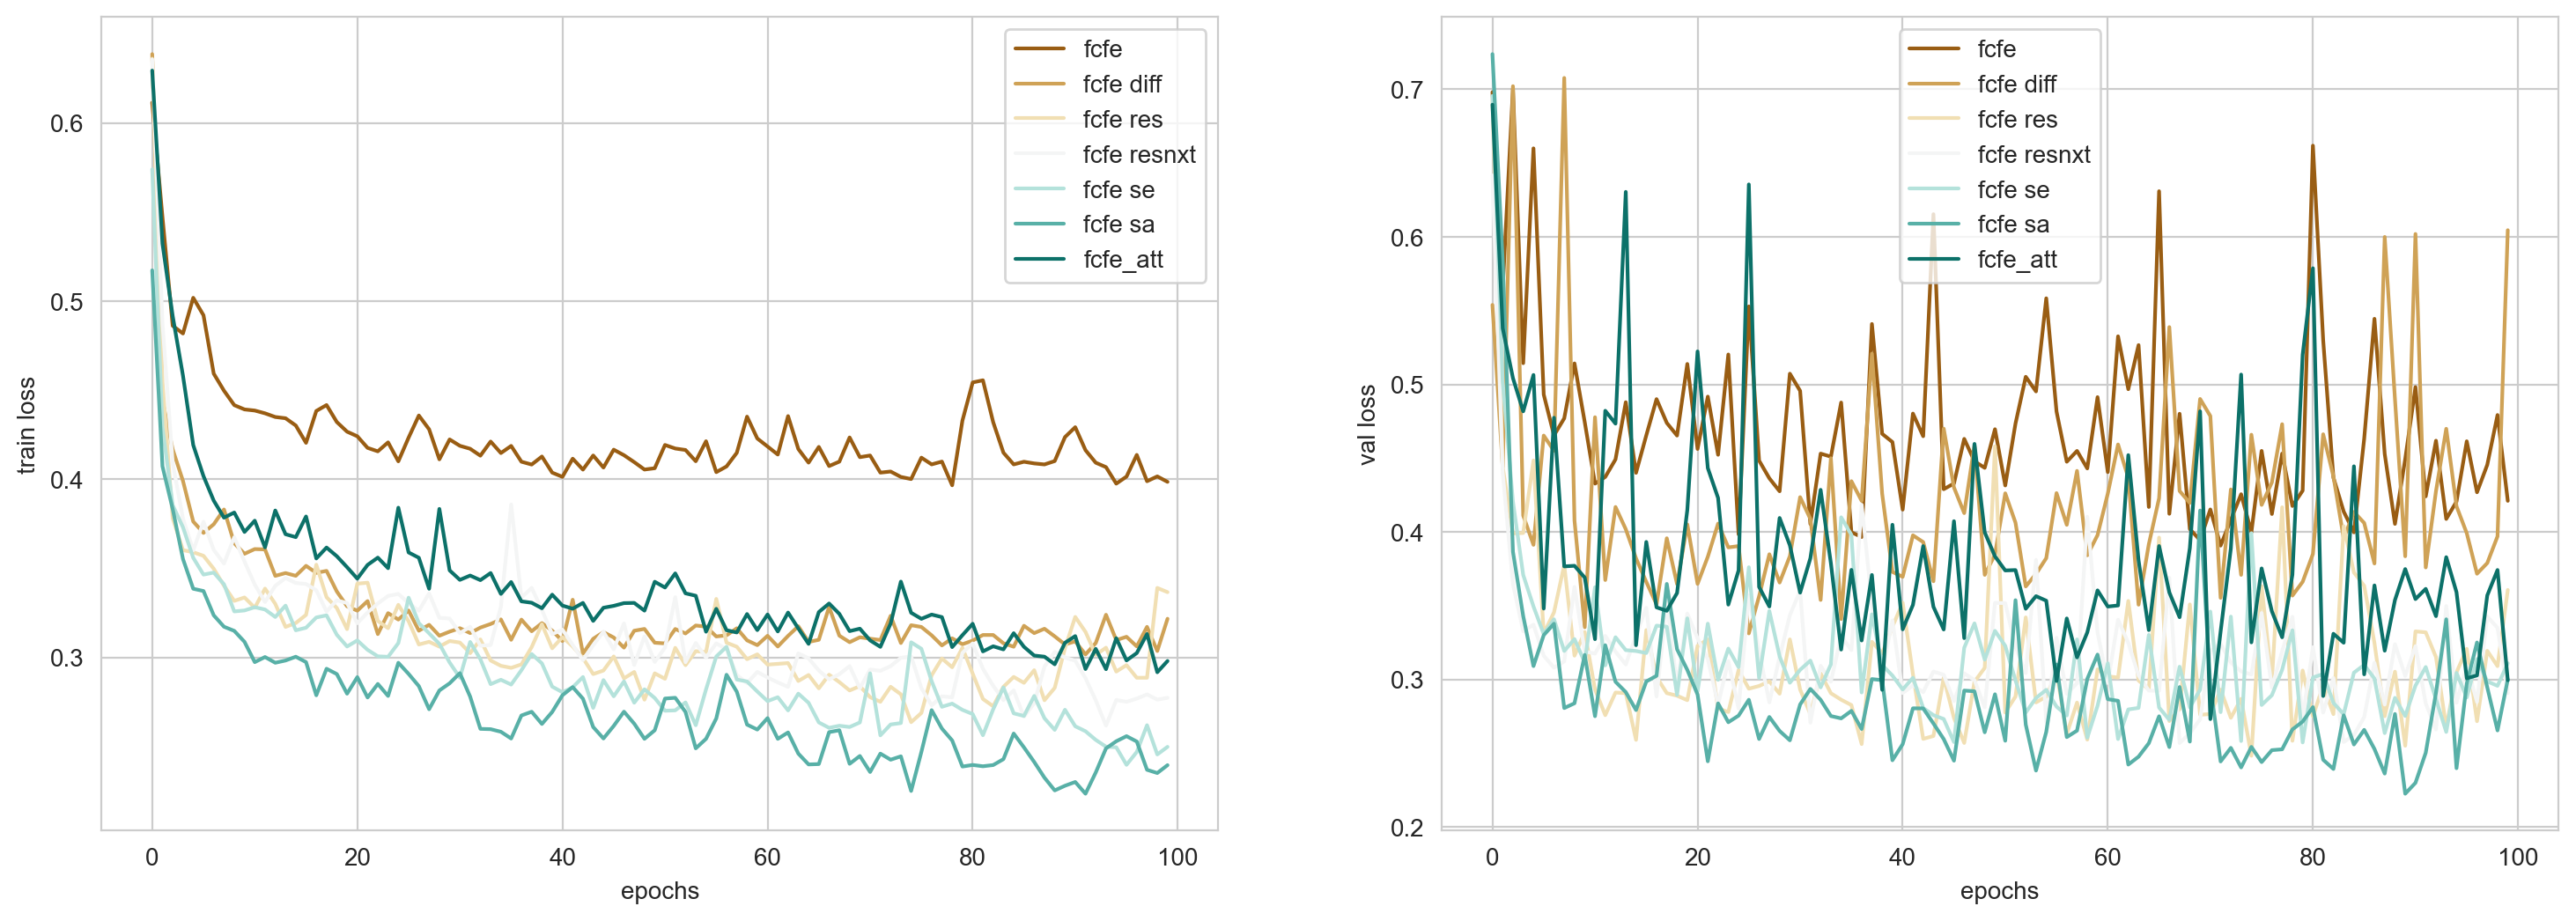

In [14]:
labels = ['fcfe', 'fcfe diff', 'fcfe res', 'fcfe resnxt', 'fcfe se', 'fcfe sa', 'fcfe_att']

plt.figure(figsize=(18, 6), dpi=200)
plt.subplot(1, 2, 1)
sns.lineplot(data=train_loss_df, dashes=False, palette=sns.color_palette('BrBG', 7), ci=None)
plt.xlabel('epochs')
plt.ylabel('train loss')
plt.legend(labels)

plt.subplot(1, 2, 2)
sns.lineplot(data=val_loss_df, dashes=False, palette=sns.color_palette('BrBG', 7), ci=None)
plt.xlabel('epochs')
plt.ylabel('val loss')
plt.legend(labels)
plt.show()

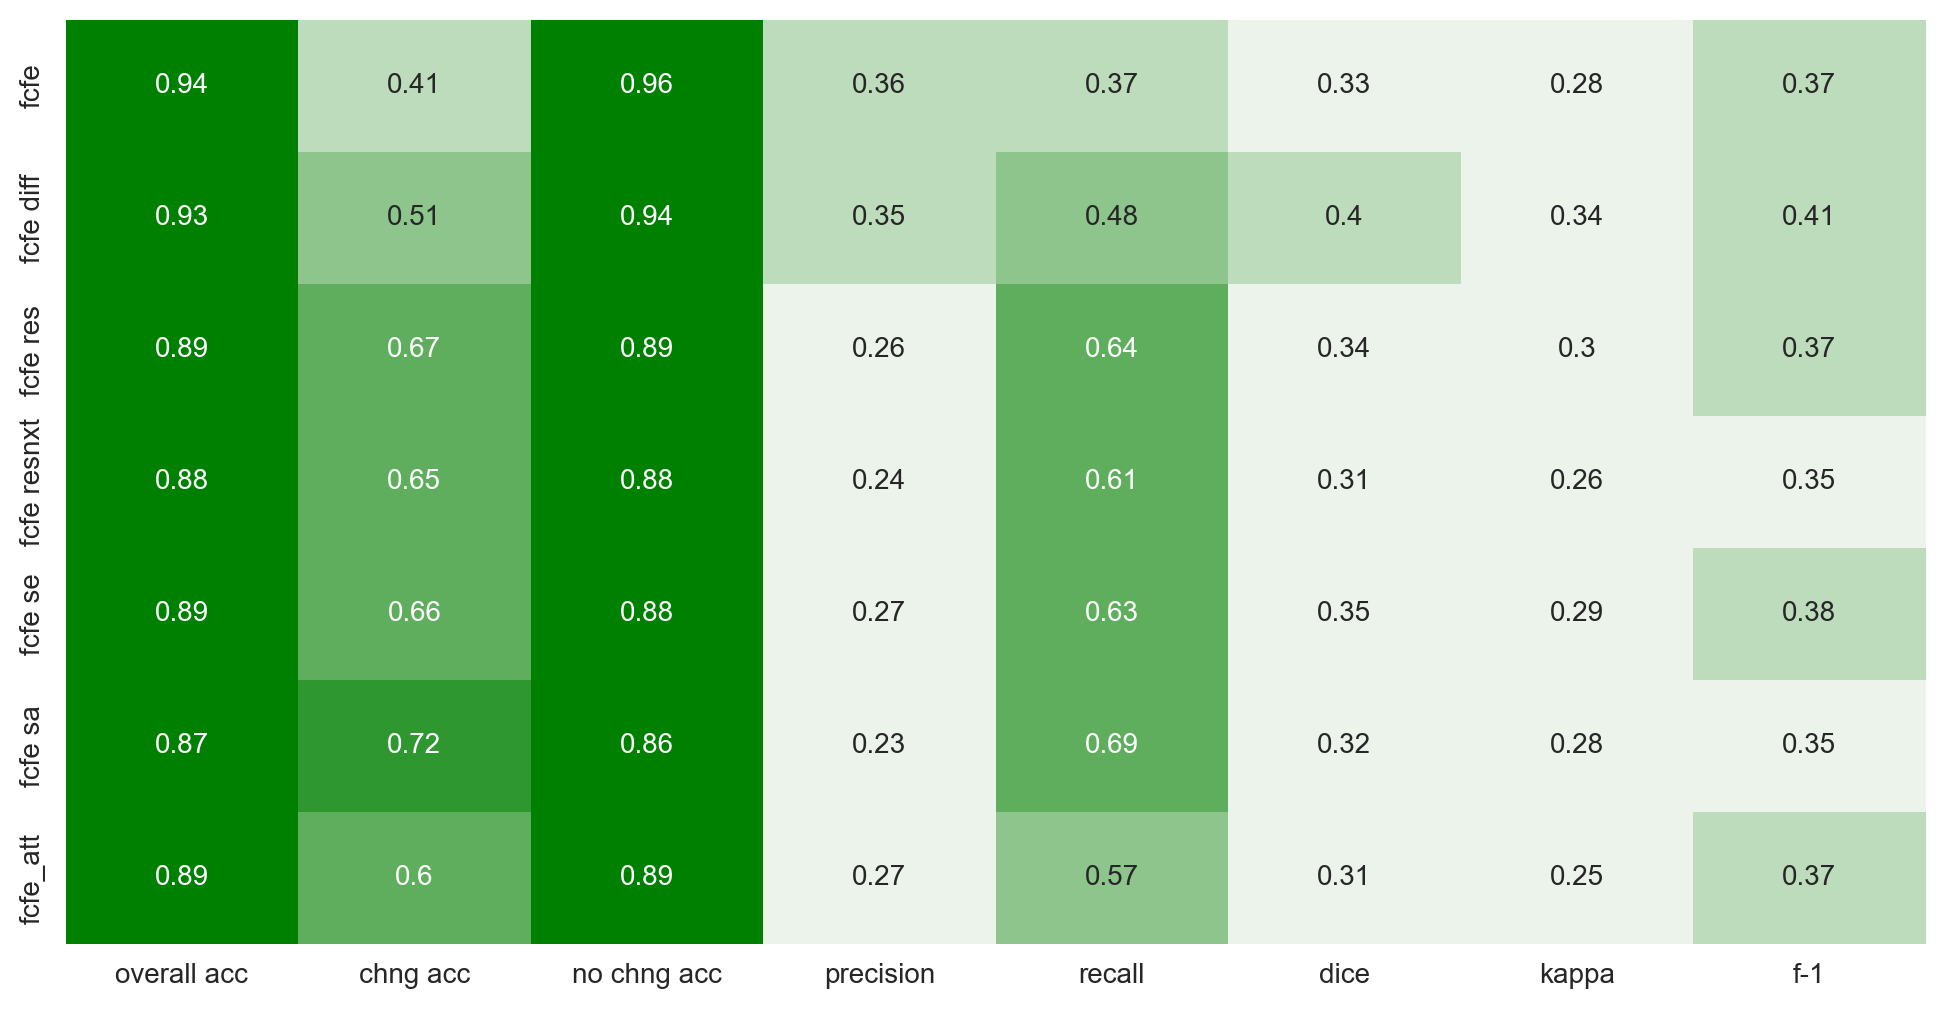

In [15]:
plt.figure(figsize=(12, 6), dpi=200)
g = sns.heatmap(full_comp,
                annot=True,
                cbar=False,
                cmap=sns.light_palette('green'))
g.set_yticklabels(labels)
g.set_xticklabels(['overall acc', 'chng acc', 'no chng acc',
                   'precision', 'recall', 'dice', 'kappa', 'f-1'])
plt.show()

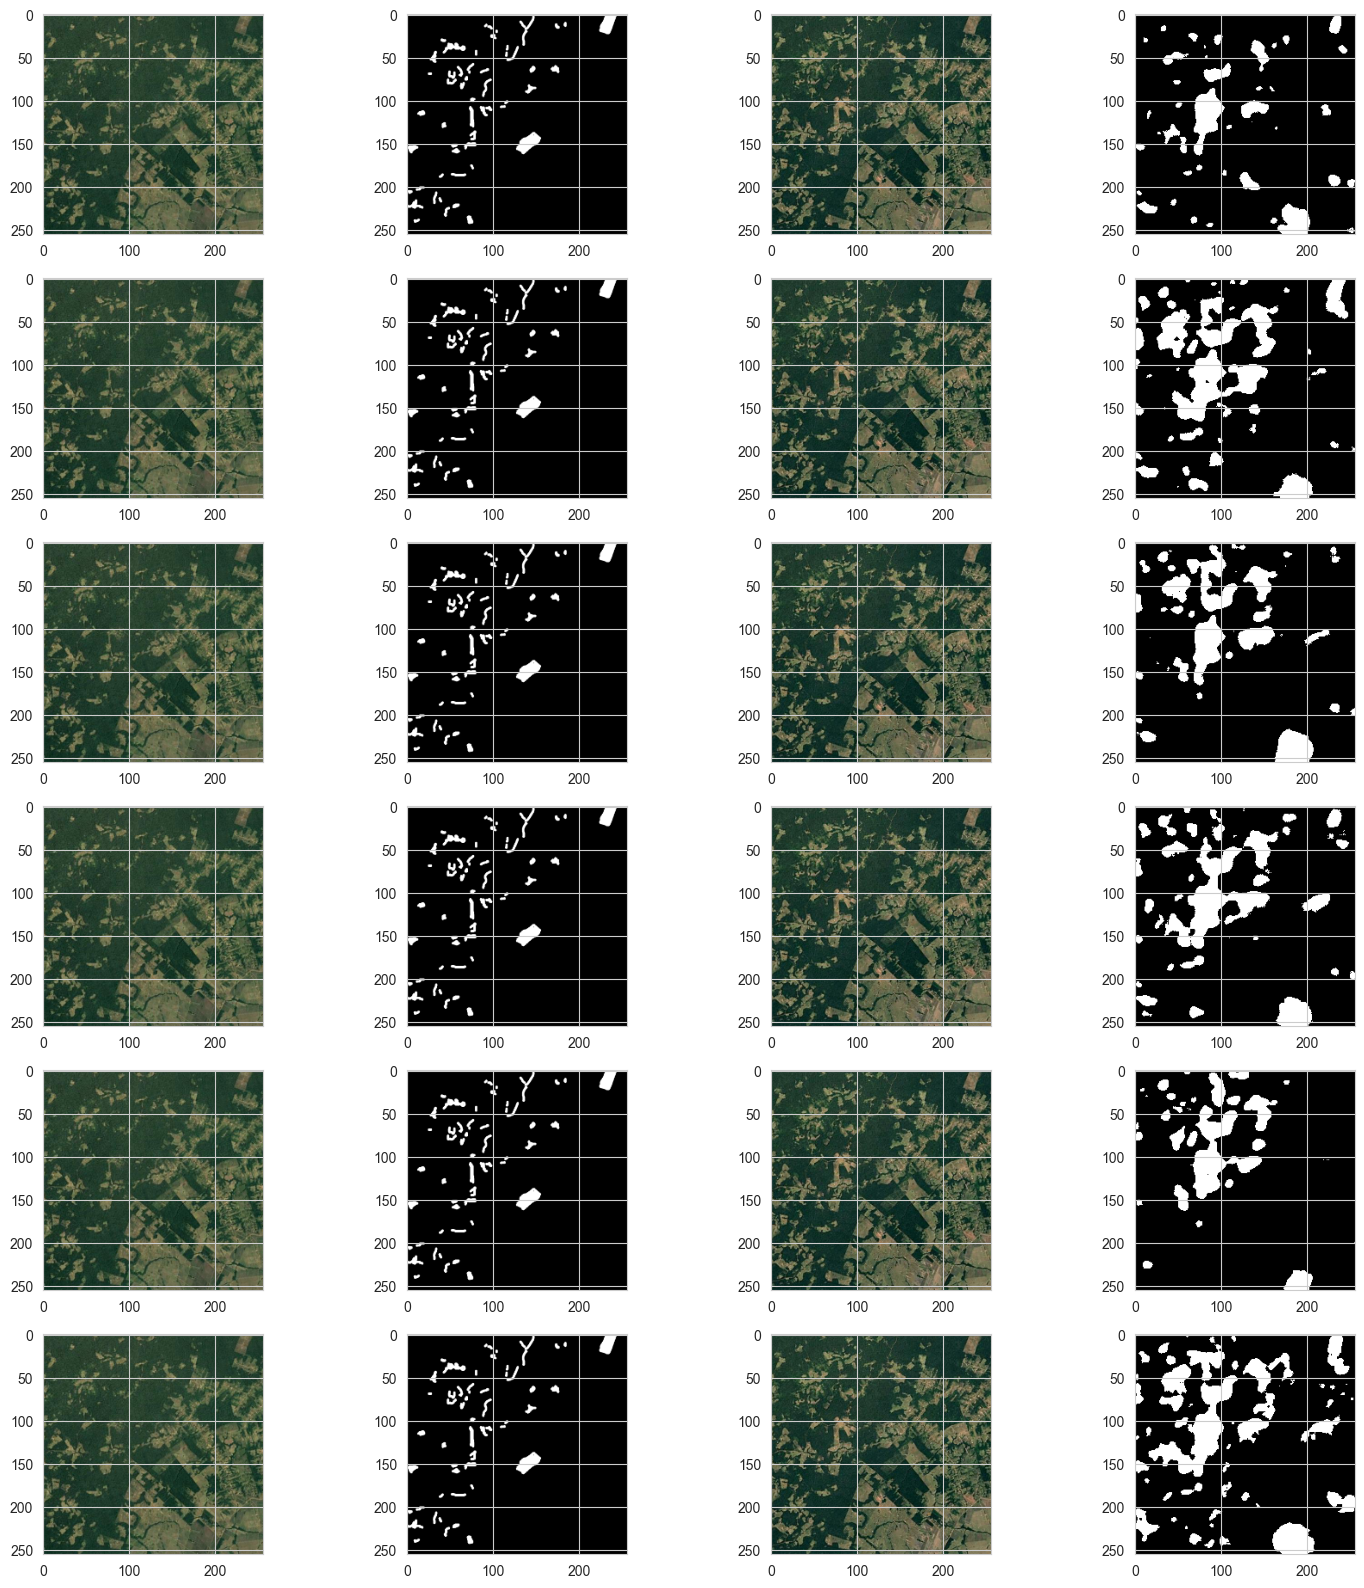

In [18]:
vis_models_prediction(df)